# IMPORTER LES MODULES

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import missingno as msno

# Lire le fichier

In [2]:
#header=0 pour ne pas lire la première ligne
data=pd.read_csv("openfood.csv",header=0, sep='\t',error_bad_lines=False, index_col=False,low_memory=False)
pd.set_option('mode.chained_assignment', None)
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=186)

#### Plus qu'1 Million de lignes et 186 colonnes

In [4]:
data.shape

(1763859, 186)

#### Types des données

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763859 entries, 0 to 1763858
Columns: 186 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(61)
memory usage: 2.4+ GB


In [6]:
# Lignes du dataframe
print('Entries: '+str(len(data)))
# Types des donnees
print(data.dtypes)

Entries: 1763859
code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 186, dtype: object


In [7]:
#nombre de produits
len(data['product_name'].unique())

1108939

#### Pourcentage de valeurs nulles

In [8]:
data.isnull().mean().head(60)*100

code                                            0.000000
url                                             0.000000
creator                                         0.000227
created_t                                       0.000000
created_datetime                                0.000000
last_modified_t                                 0.000000
last_modified_datetime                          0.000000
product_name                                    4.391678
abbreviated_product_name                       99.799134
generic_name                                   93.556401
quantity                                       74.128374
packaging                                      83.937095
packaging_tags                                 83.938512
packaging_text                                 99.785697
brands                                         47.851331
brands_tags                                    47.854562
categories                                     52.210069
categories_tags                

#### POURCENTAGE NAN COLONNES

In [9]:
data.loc[:,'pnns_groups_2'].isna().mean().round(4)*100

0.02

In [10]:
data['pnns_groups_2'].unique()

array(['unknown', 'Dressings and sauces', 'One-dish meals',
       'Biscuits and cakes', 'Fruits', 'Meat', 'Sweetened beverages',
       'Cheese', 'Bread', 'Fish and seafood', 'Sweets',
       'Salty and fatty products', 'Fruit juices', 'Dried fruits',
       'Vegetables', 'Fats', 'Dairy desserts', 'Milk and yogurt',
       'pastries', 'Pizza pies and quiche', 'Legumes',
       'Unsweetened beverages', 'Nuts', 'Cereals', 'Alcoholic beverages',
       'Breakfast cereals', 'Appetizers', 'Processed meat',
       'Chocolate products', 'Eggs', 'Plant-based milk substitutes',
       'vegetables', 'Sandwiches', 'Ice cream', 'Soups',
       'Teas and herbal teas and coffees', 'Potatoes',
       'Artificially sweetened beverages', nan,
       'Waters and flavored waters', 'Offals', 'fruits', 'Fruit nectars',
       'Pizza pies and quiches', 'cereals', 'legumes', 'nuts'],
      dtype=object)

# %NAN dans le dataset

In [11]:
null_vals=data.isnull().sum()
total_val_sum=np.product(data.shape) #Total des valeurs dans le dataset
null_val_sum=null_vals.sum() #Tous les valeurs nulles dans le dataset
print(null_val_sum/total_val_sum*100,'% de valeurs nulles dans le dataset.')

79.57204440188625 % de valeurs nulles dans le dataset.


# %NAN dans les colonnes

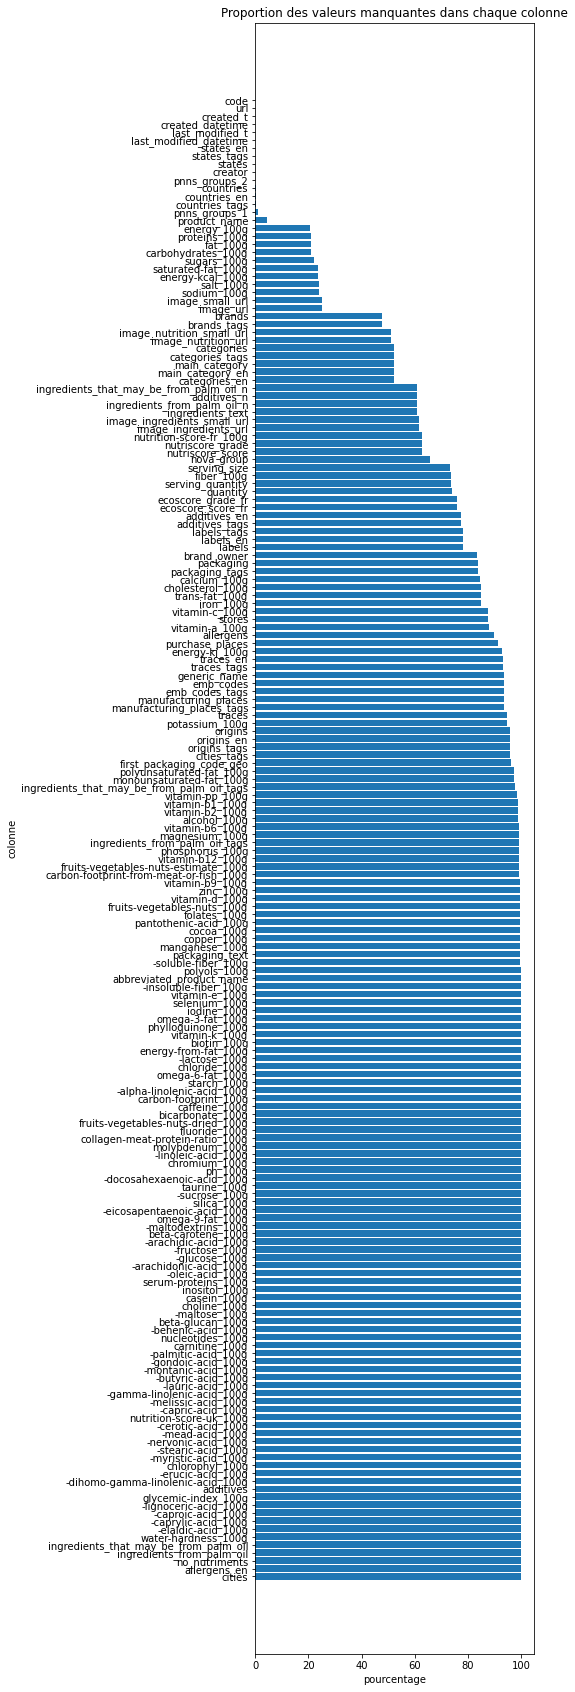

In [12]:
#Taille de la figure
plt.figure(figsize=(5,30))
#Prepare the data
#Conter et trier par le nombre de valeurs manquantes
counts_series = data.isnull().mean(axis=0).apply(lambda x: x*100).sort_values(ascending=False)
#Ajouter titre et labels
plt.title("Proportion des valeurs manquantes dans chaque colonne")
plt.ylabel("colonne")
plt.xlabel("pourcentage")
#Plot du graphique
plt.barh(counts_series.index,counts_series.values)
# Toujours show apres plotting ⚡
plt.show()

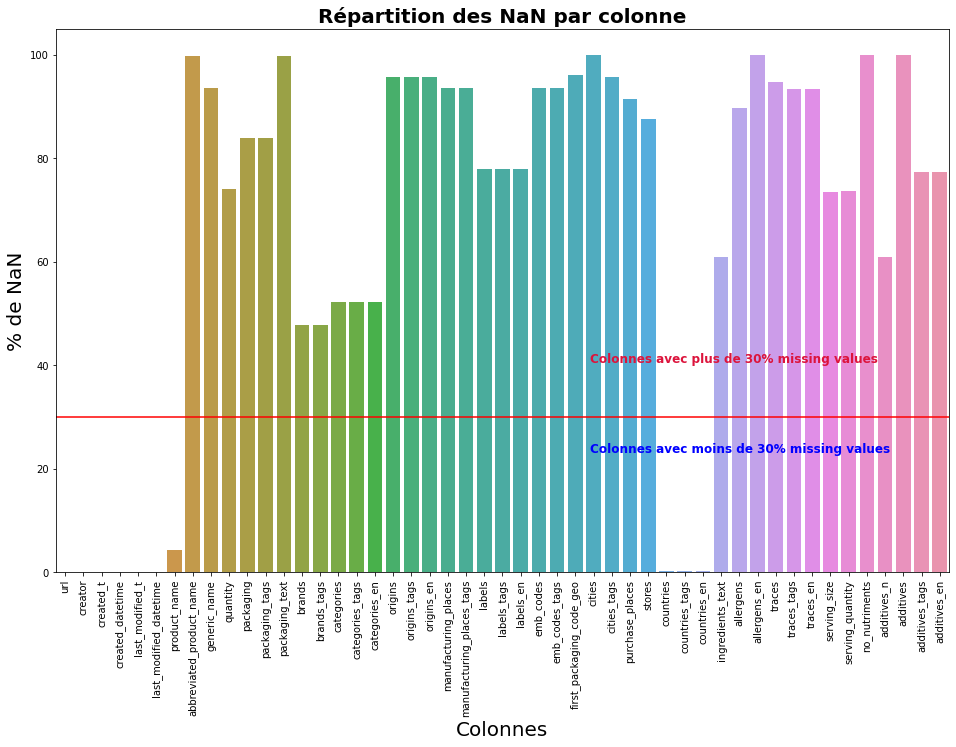

In [13]:
#Répartition des NAN par colonne
plt.figure(figsize=(16,10))
thresh_na = 30
#ON prend a chaque fois une partie des colonnes pour que les graphiques soient lisibles (là c'est les premieres 50 colonnes)
df1=data.iloc[:,1:50]
ax = plt.subplot(1,1,1)
perc = (df1.isnull().sum()/df1.shape[0])*100

ax = sns.barplot(x=df1.columns,y=perc)
plt.axhline(y=thresh_na, color='r', linestyle='-')
plt.text(len(df1.isnull().sum()/len(df1))/1.7, thresh_na+12.5, 'Colonnes avec plus de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='crimson', ha='left' ,va='top')
plt.text(len(df1.isnull().sum()/len(df1))/1.7, thresh_na - 5, 'Colonnes avec moins de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='blue', ha='left' ,va='top')

ax.set_title('Répartition des NaN par colonne',fontsize=20, weight='bold')
ax.set_xlabel('Colonnes',fontsize=20)
ax.set_ylabel('% de NaN',fontsize=20)
ax.set_xticklabels(df1.columns,rotation=90)

plt.show()

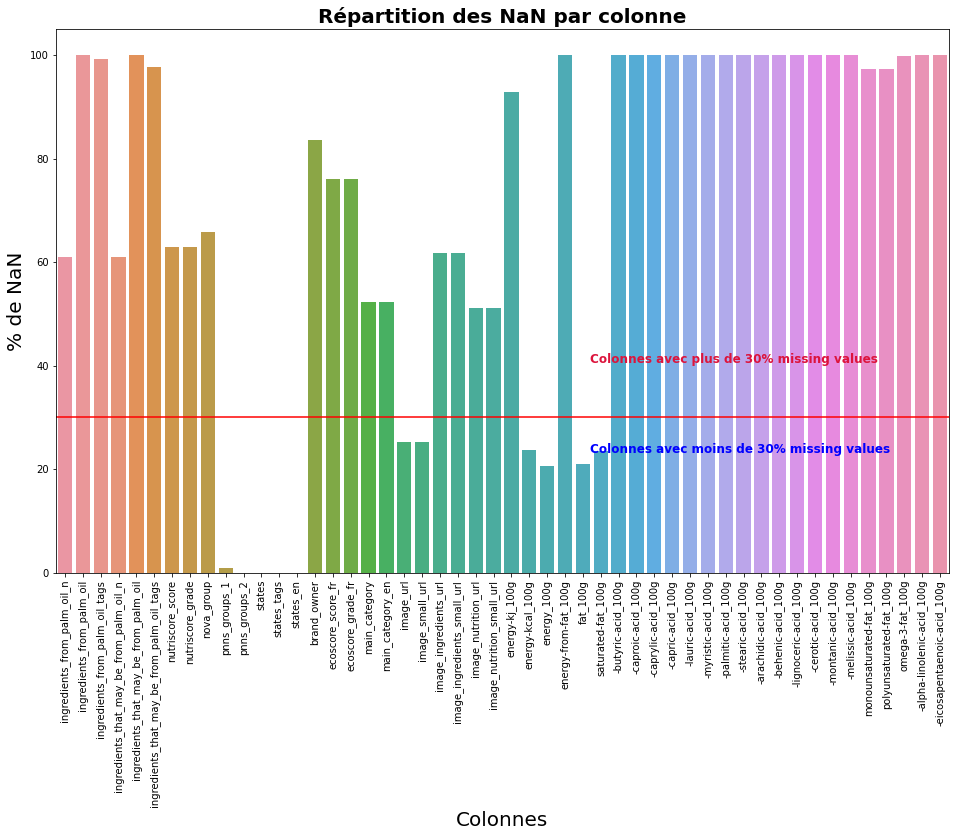

In [14]:
#Répartition des NAN par colonne
plt.figure(figsize=(16,10))
thresh_na = 30
df2=data.iloc[:,50:100]
ax = plt.subplot(1,1,1)
perc = (df2.isnull().sum()/df2.shape[0])*100

ax = sns.barplot(x=df2.columns,y=perc)
plt.axhline(y=thresh_na, color='r', linestyle='-')
plt.text(len(df2.isnull().sum()/len(df2))/1.7, thresh_na+12.5, 'Colonnes avec plus de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='crimson', ha='left' ,va='top')
plt.text(len(df2.isnull().sum()/len(df2))/1.7, thresh_na - 5, 'Colonnes avec moins de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='blue', ha='left' ,va='top')

ax.set_title('Répartition des NaN par colonne',fontsize=20, weight='bold')
ax.set_xlabel('Colonnes',fontsize=20)
ax.set_ylabel('% de NaN',fontsize=20)
ax.set_xticklabels(df2.columns,rotation=90)

plt.show()

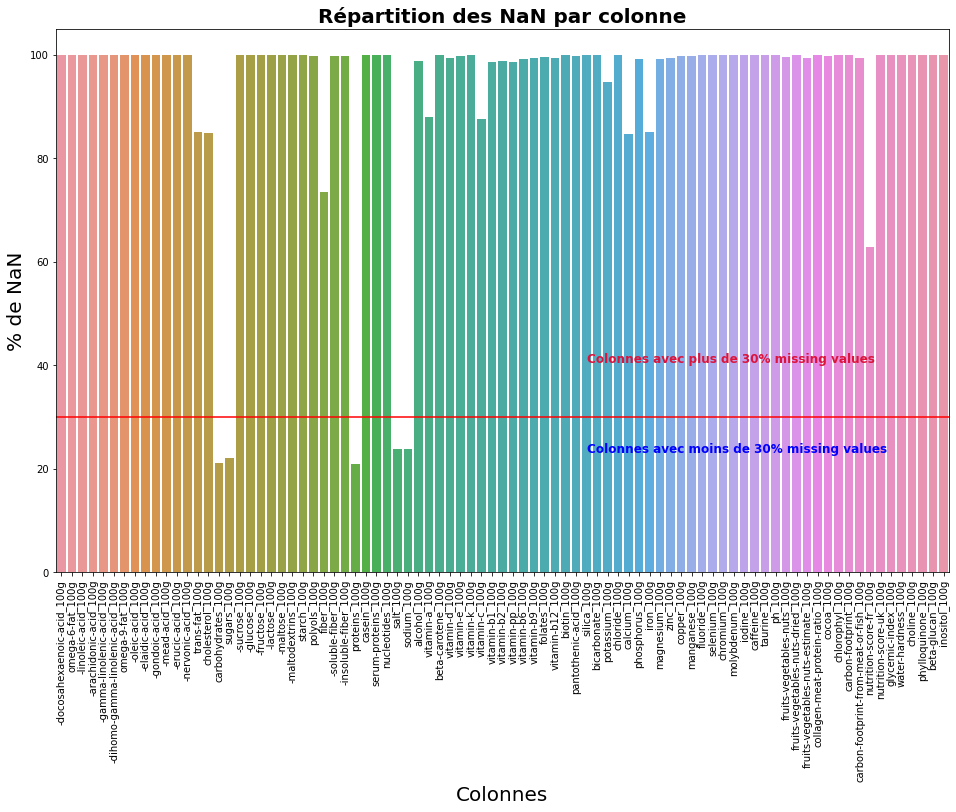

In [15]:
#Répartition des NAN par colonne
plt.figure(figsize=(16,10))
thresh_na = 30
df3=data.iloc[:,100:-1]
ax = plt.subplot(1,1,1)
perc = (df3.isnull().sum()/df3.shape[0])*100

ax = sns.barplot(x=df3.columns,y=perc)
plt.axhline(y=thresh_na, color='r', linestyle='-')
plt.text(len(df3.isnull().sum()/len(df3))/1.7, thresh_na+12.5, 'Colonnes avec plus de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='crimson', ha='left' ,va='top')
plt.text(len(df3.isnull().sum()/len(df3))/1.7, thresh_na - 5, 'Colonnes avec moins de %s%s missing values' %(thresh_na, '%'), fontsize=12,weight='bold', color='blue', ha='left' ,va='top')

ax.set_title('Répartition des NaN par colonne',fontsize=20, weight='bold')
ax.set_xlabel('Colonnes',fontsize=20)
ax.set_ylabel('% de NaN',fontsize=20)
ax.set_xticklabels(df3.columns,rotation=90)

plt.show()

# SUPPRIMER LES COLONNES AVEC PLUS DE 30% NAN

#### Sélectionner les variables avec moins de 30% NaN

In [16]:
# Change this to change the threshold for filtering - 0 to 100
cutoff = 30

def split_data_by_nan(data,threshold):
    # percentage of null rows
    s = data.isnull().mean(axis=0).apply(lambda x: x*100)
    # keep column if less nulls than threshold
    cols_of_interest = s[s<= threshold].index
    return cols_of_interest

# Filter columns by threshold
df_fs = data[split_data_by_nan(data,cutoff)]

print("Nombre original de variables: " + str(data.shape[1]))
print("Nombre de variables avec moins de "+ str(cutoff)+"% nans: " + str(df_fs.shape[1]))
print(df_fs.columns)

Nombre original de variables: 186
Nombre de variables avec moins de 30% nans: 27
Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'countries', 'countries_tags', 'countries_en', 'pnns_groups_1',
       'pnns_groups_2', 'states', 'states_tags', 'states_en', 'image_url',
       'image_small_url', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')


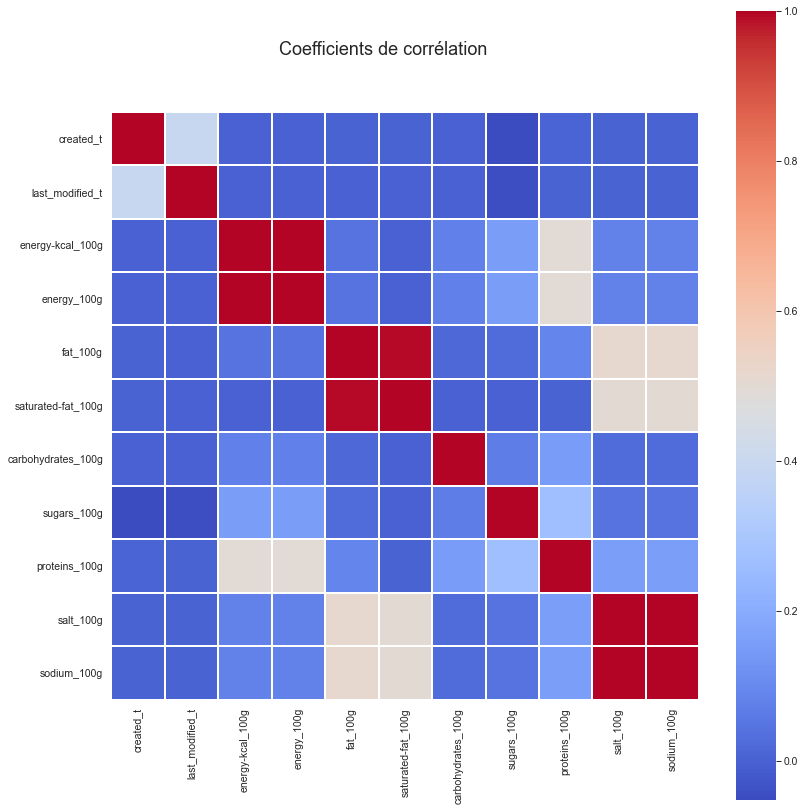

In [17]:
sns.set(context="paper", font_scale = 1.2)
# compute the correlation matrix for all the numeric columns
corrmat = df_fs.corr()
# size of the plot
f, ax = plt.subplots(figsize=(12, 12))
# set the plot heading
f.text(0.45, 0.93, "Coefficients de corrélation", ha='center', fontsize = 18)
# plot matrix as a heatmap
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

# SELECTIONNER LES COLONNES QUI NOUS INTERESSENT

In [18]:
newdf=data.loc[:,['product_name','categories','main_category_en','pnns_groups_2','brands','carbohydrates_100g','sugars_100g','proteins_100g','saturated-fat_100g','code','image_url']]
newdf

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
0,Vitória crackers,NaN,NaN,unknown,NaN,70.1,15.0,7.8,3.08,0000000000017,https://static.openfoodfacts.org/images/produc...
1,Cacao,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,0000000000031,https://static.openfoodfacts.org/images/produc...
2,Filetes de pollo empanado,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,000000000003327986,https://static.openfoodfacts.org/images/produc...
3,Hamburguesas de ternera 100%,NaN,NaN,unknown,NaN,2.6,1.0,15.7,6.10,000000000004622327,https://static.openfoodfacts.org/images/produc...
4,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Mustards,Dressings and sauces,courte paille,29.0,22.0,5.1,2.20,0000000000100,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...
1763854,Sandwich club Rillette poisson combava,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,9999999910128,https://static.openfoodfacts.org/images/produc...
1763855,Thé noir BIO Darjeeling,NaN,NaN,unknown,Pagès,NaN,NaN,NaN,NaN,999999999,NaN
1763856,Fati,NaN,NaN,unknown,NaN,2.4,0.6,1.6,0.00,9999999990397,https://static.openfoodfacts.org/images/produc...
1763857,Light & Free SKYR A BOIRE,NaN,NaN,unknown,NaN,8.0,7.8,5.5,0.10,9999999999994,https://static.openfoodfacts.org/images/produc...


#### On remarque qu'on a des produits qui ne sont pas de la nourriture

In [19]:
newdf[newdf['product_name']=='Signal Toothpaste']

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
1763858,Signal Toothpaste,"Non food products, Open Beauty Facts, Toothpaste",Toothpaste,unknown,NaN,NaN,NaN,NaN,NaN,999999999999999,https://static.openfoodfacts.org/images/produc...


# GARDER UNIQUEMENT LES PRODUITS ALIMENTAIRES

In [20]:
fooddf=newdf[newdf['categories'].str.contains("Non food products")==False]
fooddf.reset_index(drop=True,inplace=True)
fooddf.head()

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
0,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Mustards,Dressings and sauces,courte paille,29.0,22.0,5.1,2.2,0000000000100,https://static.openfoodfacts.org/images/produc...
1,Sfiudwx,Xsf,fr:xsf,unknown,Watt,NaN,NaN,NaN,NaN,00000000001111111111,NaN
2,Pate d'amende,Pâte d'amende,fr:pate-d-amende,unknown,NaN,NaN,NaN,NaN,NaN,000000000088,https://static.openfoodfacts.org/images/produc...
3,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Seasoned shredded carrots,One-dish meals,NaN,5.3,3.9,0.9,0.1,0000000000949,https://static.openfoodfacts.org/images/produc...
4,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...


#### PROPORTION DES VALEURS MANQUANTES DANS LES COLONNES RESTANTES

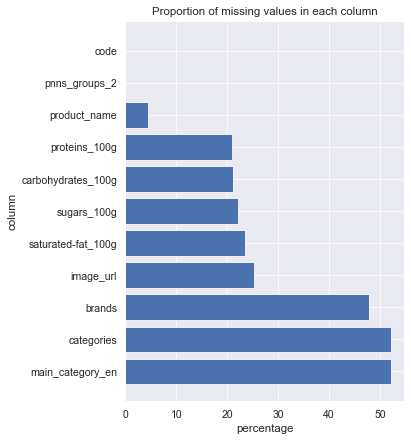

In [21]:
#Set the size of the figure
plt.figure(figsize=(5,7))
#Prepare the data
#Count and sort by the number of missing values.
counts_series = newdf.isnull().mean(axis=0).apply(lambda x: x*100).sort_values(ascending=False)
#Set the title and other labels if need be
plt.title("Proportion of missing values in each column")
plt.ylabel("column")
plt.xlabel("percentage")
#Plot the chart
plt.barh(counts_series.index,counts_series.values)
#Always show after plotting ⚡
plt.show()

#### LIGNES DUPLIQUEES EN CONSIDERANT TOUTES LES COLONNES

In [22]:
duplicateRowsDF = fooddf[fooddf.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [product_name, categories, main_category_en, pnns_groups_2, brands, carbohydrates_100g, sugars_100g, proteins_100g, saturated-fat_100g, code, image_url]
Index: []


# % des valeurs manquantes dans les colonnes numériques

In [23]:
draft = fooddf.select_dtypes(include=['float'])
draft.shape

(842433, 4)

In [24]:
draft.head()

,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
0,29.0,22.0,5.1,2.2
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.3,3.9,0.9,0.1
4,27.3,21.9,4.6,15.5


In [25]:
draft.isnull().mean()*100

carbohydrates_100g    11.899225
sugars_100g           14.020581
proteins_100g         11.858510
saturated-fat_100g    16.673848
dtype: float64

<AxesSubplot:>

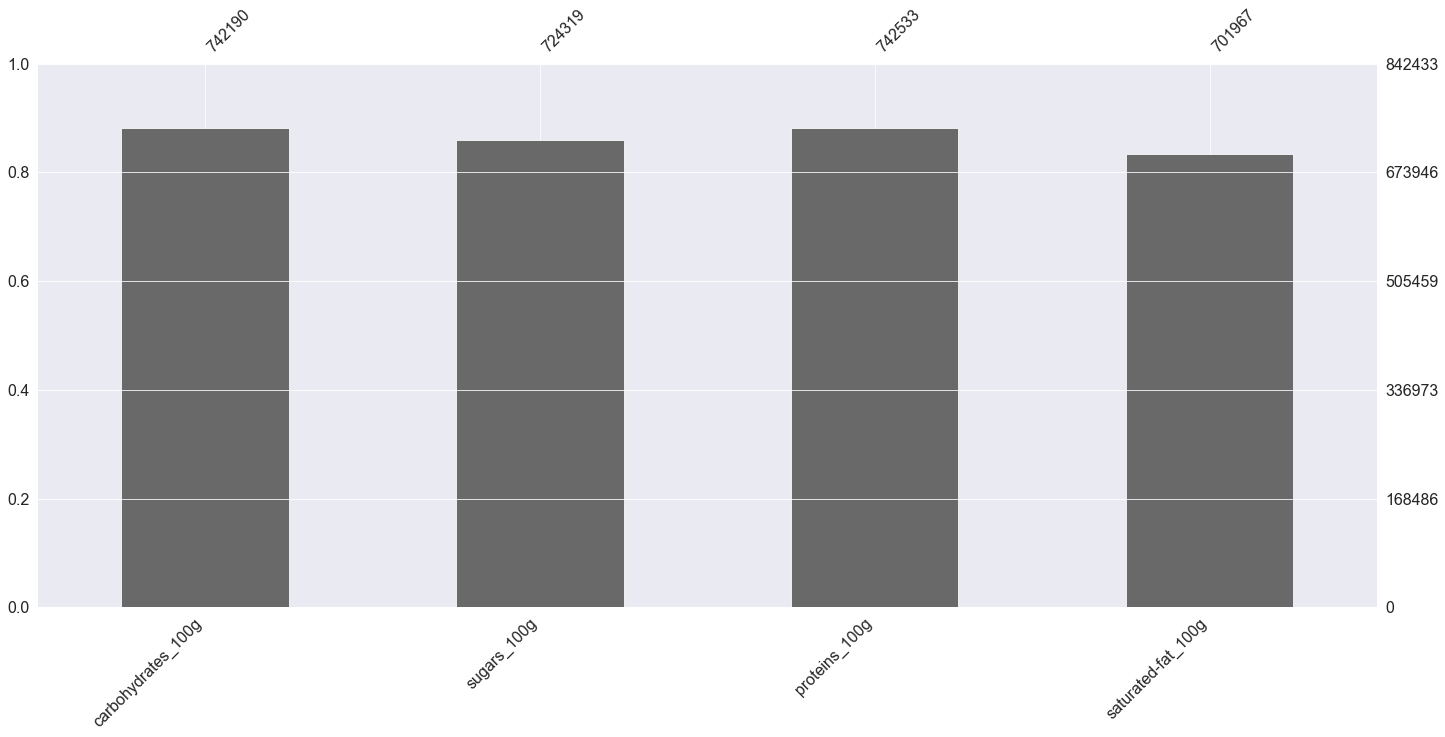

In [26]:
#visulaiser combien de valeurs nan c'est le vide 
msno.bar(draft)

In [27]:
len(fooddf['code'].unique())

842430

# TRAITER LES VALEURS MANQUANTES

In [28]:
#Merge draft with fooddf
datanotnan=pd.merge(fooddf['code'], draft,how="inner",left_index=True,right_index=True)
datanotnan

,code,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
0,0000000000100,29.0,22.0,5.1,2.2
1,00000000001111111111,NaN,NaN,NaN,NaN
2,000000000088,NaN,NaN,NaN,NaN
3,0000000000949,5.3,3.9,0.9,0.1
4,0000000001281,27.3,21.9,4.6,15.5
...,...,...,...,...,...
842428,9999992756068,NaN,NaN,NaN,NaN
842429,9999999004360,30.9,10.4,7.4,6.0
842430,9999999175305,35.0,24.0,2.6,4.8
842431,99999995,0.0,0.0,21.5,2.3


# SUPPRIMER LIGNES QUAND TOUTES LES VALEURS SONT NULLES

In [29]:
#FIND PERCENTAGE OF MISSING VALUES FOR produits
produitsnotnan=datanotnan.set_index('code')
#drop quand toutes les valeurs de la ligne sont NAN
produitsnotnan=produitsnotnan.dropna(axis=0, how='all')
print(produitsnotnan.shape)

(746475, 4)


In [30]:
produitsnotnan

,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
code,,,,
0000000000100,29.0,22.0,5.1,2.2
0000000000949,5.3,3.9,0.9,0.1
0000000001281,27.3,21.9,4.6,15.5
0000000001885,36.0,27.0,0.6,0.0
0000000002257,3.9,1.0,1.9,1.0
...,...,...,...,...
9999991042742,19.0,18.0,6.0,17.0
9999991149090,80.0,0.0,7.0,0.0
9999999004360,30.9,10.4,7.4,6.0


In [31]:
listeproduits=produitsnotnan.index
listeproduits
fooddf=fooddf[fooddf['code'].isin(listeproduits)]
fooddf
fooddf.reset_index(drop=True,inplace=True)
fooddf.head()


,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
0,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Mustards,Dressings and sauces,courte paille,29.0,22.0,5.1,2.2,0000000000100,https://static.openfoodfacts.org/images/produc...
1,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Seasoned shredded carrots,One-dish meals,NaN,5.3,3.9,0.9,0.1,0000000000949,https://static.openfoodfacts.org/images/produc...
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...
4,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",Vegetables macedoines,One-dish meals,NaN,3.9,1.0,1.9,1.0,0000000002257,https://static.openfoodfacts.org/images/produc...


# SUPPRIMER LIGNES AVEC >=60% NAN

In [32]:
fooddf.shape

(746475, 11)

In [33]:
#FIND PERCENTAGE OF MISSING VALUES FOR PAYS
produitssomenan=fooddf.set_index('code').isna().sum(level=0)
produitssomenan=produitssomenan.drop(['product_name','categories','image_url'],axis=1)
produitssomenan['Somme NAN']=produitssomenan.sum(axis=1) #sum by row
produitssomenan['Percentage NAN']=(produitssomenan['Somme NAN']/5).round(2)*100
#del paysdf['Indicateur']
produitssomenan = produitssomenan.sort_values(by='Somme NAN',ascending=False)
produitssomenan

,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,Somme NAN,Percentage NAN
code,,,,,,,,,
3346040127602,0,0,1,1,1,1,0,4,80.0
3300790003050,0,0,1,1,1,1,0,4,80.0
0604485007730,0,0,1,0,1,1,1,4,80.0
3760097451143,0,0,1,1,1,1,0,4,80.0
0712998000329,0,0,1,0,1,1,1,4,80.0
...,...,...,...,...,...,...,...,...,...
3073781139471,0,0,0,0,0,0,0,0,0.0
3073781139440,0,0,0,0,0,0,0,0,0.0
3073781139211,0,0,0,0,0,0,0,0,0.0


In [34]:
somme=produitssomenan['Somme NAN'].sum()
print(somme)
produitssomenan[produitssomenan['Percentage NAN']>0]

287000


,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,Somme NAN,Percentage NAN
code,,,,,,,,,
3346040127602,0,0,1,1,1,1,0,4,80.0
3300790003050,0,0,1,1,1,1,0,4,80.0
0604485007730,0,0,1,0,1,1,1,4,80.0
3760097451143,0,0,1,1,1,1,0,4,80.0
0712998000329,0,0,1,0,1,1,1,4,80.0
...,...,...,...,...,...,...,...,...,...
0047997124500,0,0,0,0,0,0,1,1,20.0
0072878806503,0,0,1,0,0,0,0,1,20.0
0047924912316,0,0,1,0,0,0,0,1,20.0


In [35]:
produitsrestants = produitssomenan[produitssomenan['Percentage NAN']<60]
listerestants=produitsrestants.index
fooddf=fooddf[fooddf['code'].isin(listerestants)]
fooddf
fooddf.reset_index(drop=True,inplace=True)
fooddf.head()


,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
0,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Mustards,Dressings and sauces,courte paille,29.0,22.0,5.1,2.2,0000000000100,https://static.openfoodfacts.org/images/produc...
1,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Seasoned shredded carrots,One-dish meals,NaN,5.3,3.9,0.9,0.1,0000000000949,https://static.openfoodfacts.org/images/produc...
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...
4,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",Vegetables macedoines,One-dish meals,NaN,3.9,1.0,1.9,1.0,0000000002257,https://static.openfoodfacts.org/images/produc...


In [36]:
fooddf.shape

(740270, 11)

In [37]:
fooddf.isnull().mean()*100

product_name           0.360814
categories             0.000000
main_category_en       0.000000
pnns_groups_2          0.000000
brands                27.969930
carbohydrates_100g     0.331501
sugars_100g            2.251071
proteins_100g          0.269766
saturated-fat_100g     5.349535
code                   0.000000
image_url             38.870007
dtype: float64

#### ON REMARQUE QU'ON A PLUSIEURS PRODUITS MEME NOM

In [38]:
fooddf[fooddf['product_name']=='Luxury Christmas Pudding']

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
64,Luxury Christmas Pudding,"Desserts, Puddings, Christmas Puddings",Christmas Puddings,Biscuits and cakes,"Asda,Asda Extra Special",54.2,44.0,3.9,3.6,0000027533024,https://static.openfoodfacts.org/images/produc...
65,Luxury Christmas Pudding,"Snacks, Desserts, Sweet snacks, Biscuits and c...",Christmas Puddings,Biscuits and cakes,"Asda,Asda Extra Special",54.2,44.0,3.9,3.6,0000027533048,https://static.openfoodfacts.org/images/produc...
576949,Luxury Christmas Pudding,"Desserts, Puddings, Christmas Puddings",Christmas Puddings,Biscuits and cakes,Iceland,53.0,40.3,3.5,3.9,5010482570873,https://static.openfoodfacts.org/images/produc...


### NOMBRE DE NAN DANS LES DONNEES NUTRITIONELLES

In [39]:
def nutrinb(donnee):
    NUTRITION_COL = [c for c in donnee.columns if c.endswith('_100g')]
    dftemp=donnee[NUTRITION_COL].isnull().sum(axis=1)
    print("{} produits n'ont pas de données nutritionnelles ie {}% of the data".format(dftemp.sum(), (dftemp.sum()*100/donnee.shape[0]))) 

In [40]:
nutrinb(fooddf)

60716 produits n'ont pas de données nutritionnelles ie 8.201872289840193% of the data


# SUPPRIMER LIGNES DUPLIQUEES (nom produit,valeurs nutriments, marques)

In [41]:
fooddf.shape

(740270, 11)

In [42]:
fooddf=fooddf.drop_duplicates(subset=['product_name','carbohydrates_100g','proteins_100g','saturated-fat_100g','brands'], keep="first")
fooddf

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
0,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",Mustards,Dressings and sauces,courte paille,29.0,22.0,5.1,2.2,0000000000100,https://static.openfoodfacts.org/images/produc...
1,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",Seasoned shredded carrots,One-dish meals,NaN,5.3,3.9,0.9,0.1,0000000000949,https://static.openfoodfacts.org/images/produc...
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...
4,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",Vegetables macedoines,One-dish meals,NaN,3.9,1.0,1.9,1.0,0000000002257,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...
740265,Mousse au chocolat noir,"Desserts, Desserts au chocolat, Mousses au cho...",Chocolate mousses,unknown,NaN,19.0,18.0,6.0,17.0,9999991042742,https://static.openfoodfacts.org/images/produc...
740266,Riz parfumé,"Aliments et boissons à base de végétaux, Alime...",Aromatic rices,Cereals,King Elephant,80.0,0.0,7.0,0.0,9999991149090,https://static.openfoodfacts.org/images/produc...
740267,Minis beignets,"Snacks, Snacks sucrés, Beignets sucrés",Sweet Fritters,unknown,NaN,30.9,10.4,7.4,6.0,9999999004360,https://static.openfoodfacts.org/images/produc...
740268,Erdbeerkuchen 1019g tiefgefroren,"Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen",de:tiefkühl-kuchen,Biscuits and cakes,Coppenrath & Wiese,35.0,24.0,2.6,4.8,9999999175305,https://static.openfoodfacts.org/images/produc...


# REMPLACER LES VALEURS NULLES

#### Nombre de NaN dans les valeurs nutritionelles apres supression des lignes dupliquées

In [43]:
nutrinb(fooddf)

55419 produits n'ont pas de données nutritionnelles ie 7.987219065902232% of the data


In [44]:
fooddf.isnull().mean()*100

product_name           0.379335
categories             0.000000
main_category_en       0.000000
pnns_groups_2          0.000000
brands                25.869285
carbohydrates_100g     0.345610
sugars_100g            2.202074
proteins_100g          0.285654
saturated-fat_100g     5.153881
code                   0.000000
image_url             38.001949
dtype: float64

In [45]:
#gader les lignes avec product_name pas nulle
fooddf = fooddf[~fooddf['product_name'].isnull()]

In [46]:
#remplacer les image_url nulles par un lien 
url='https://www.bing.com/images/search?view=detailV2&ccid=dFCRZe%2fd&id=ACB4B81A117B0F40CE26459CED3C0179931E035C&thid=OIP.dFCRZe_drlYC1ySeTcMhrAHaE8&mediaurl=https%3a%2f%2fmir-s3-cdn-cf.behance.net%2fproject_modules%2fdisp%2fe2010932990697.5605cdfc24634.png&cdnurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR74509165efddae5602d7249e4dc321ac%3frik%3dXAMek3kBPO2cRQ%26pid%3dImgRaw&exph=400&expw=600&q=food+product+logo&simid=608007609310390666&ck=353BF5E266A6FF00049E36D847F0C1FC&selectedIndex=12&FORM=IRPRST&ajaxhist=0&ajaxserp=0'
fooddf['image_url'].fillna(url, inplace=True)

In [47]:
#remplacer brands nulles par Inconnu
fooddf['brands'].fillna('Inconnu', inplace=True)

In [48]:
fooddf.describe()

,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
count,688847.000000,676051.000000,689346.000000,6.556880e+05
mean,30.257014,14.136481,8.154310,2.050420e+01
std,930.385321,21.688450,208.603054,1.234958e+04
min,-1.000000,-1.000000,0.000000,0.000000e+00
25%,4.130000,0.800000,1.100000,1.000000e-01
50%,16.620000,4.290000,5.500000,1.900000e+00
75%,54.000000,20.200000,11.110000,7.200000e+00
max,762939.000000,6880.000000,173000.000000,9.999999e+06


#### TRIER LES DONNEES PAR CATEGORIE 

In [49]:
fooddf.sort_values(by='categories')

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
372510,Madeleinettes,% de matières grasses,fr:% de matières grasses,unknown,L’atelier St Michel,53.0,24.0,5.70,2.7,3178530412222,https://static.openfoodfacts.org/images/produc...
117404,Délice végétal au lait d avoine à la pêche,% de matières grasses,fr:% de matières grasses,unknown,Riviera,12.6,8.0,2.29,0.0,0064912087375,https://static.openfoodfacts.org/images/produc...
601824,ducal,0,fr:0,unknown,ducal,0.0,0.0,0.00,0.0,5450021005815,https://static.openfoodfacts.org/images/produc...
535016,balle enfants,0,fr:0,unknown,norma balle,0.0,0.0,0.00,0.0,4006149526551,https://static.openfoodfacts.org/images/produc...
554040,Italian mineral water,0,0,unknown,water,0.0,0.0,0.00,0.0,4099100134360,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...
309302,알치네로 유기농 통밀 스파게티,파스타면,ko:파스타면,unknown,알스 네로 S.P.A,66.0,3.2,12.00,0.4,2000000116912,https://www.bing.com/images/search?view=detail...
729416,한살림 호박쌀엿,한과,ko:한과,unknown,한살림,8.8,3.5,0.11,0.0,8805713304023,https://static.openfoodfacts.org/images/produc...
729135,스팸®마일드,햄,ko:햄,unknown,CJ,2.0,2.0,14.00,11.0,8801007029658,https://static.openfoodfacts.org/images/produc...
729220,리챔,햄류 가공식품,ko:햄류-가공식품,unknown,동원,2.0,2.0,13.00,NaN,8801047181002,https://static.openfoodfacts.org/images/produc...


# NOM DE PRODUITS ET NOM DE CATEGORIES ETRANGES

In [50]:
#supprimer produits avec nom pas dans caracteres ascii
fooddf=fooddf[fooddf.product_name.map(lambda x: x.isascii())]
fooddf

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...
5,Abondance,"Produits laitiers, Produits fermentés, Produit...",Abondance,Cheese,Inconnu,0.1,0.1,25.0,21.6,0000000005005,https://static.openfoodfacts.org/images/produc...
6,cuisse de poulet direct au four curry,"Viandes, Volailles, Poulets, Cuisses de poulet",Chicken thighs,Meat,Inconnu,3.0,0.9,17.0,4.0,0000000005166,https://static.openfoodfacts.org/images/produc...
7,Bagel,"Aliments et boissons à base de végétaux, Alime...",Bagel breads,Bread,Inconnu,28.7,3.0,8.4,1.1,0000000005241,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...
740263,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Dark chocolates,Chocolate products,Barry,30.7,26.9,7.6,28.2,9999900002553,https://static.openfoodfacts.org/images/produc...
740264,Riz au lait,"Desserts, Puddings, Riz au lait",Rice puddings,Dairy desserts,Inconnu,21.0,14.0,2.9,4.3,9999991042711,https://static.openfoodfacts.org/images/produc...
740265,Mousse au chocolat noir,"Desserts, Desserts au chocolat, Mousses au cho...",Chocolate mousses,unknown,Inconnu,19.0,18.0,6.0,17.0,9999991042742,https://static.openfoodfacts.org/images/produc...
740267,Minis beignets,"Snacks, Snacks sucrés, Beignets sucrés",Sweet Fritters,unknown,Inconnu,30.9,10.4,7.4,6.0,9999999004360,https://static.openfoodfacts.org/images/produc...


# REMPLACER LES CARACTERES SPECIALS

#### CARACTERES ETRANGES DANS LES NOMS DES PRODUITS

In [51]:
print(fooddf[fooddf['product_name'].str.contains(r'[@#&$%+-/*]')])

                                       product_name  \
40                          A&w - Root Beer - 355ml   
60          Foie gras de canard entier du sud-ouest   
66                       Mendiants - Studentenhaver   
70                              M&M's Peanut Butter   
91                                Nacho nuss-nougat   
...                                             ...   
740209                             Light&free kefir   
740222              Digestive Go! - Manzana y avena   
740236  Jus de fruit Innocent pomme ,peche et poire   
740240               Almondmilk beverage, chocolate   
740242                         Oignons jaunes 40/60   

                                               categories  \
40                                               Boissons   
60      Poissons et viandes et oeufs, Foies gras, Foie...   
66      Aliments et boissons à base de végétaux, Alime...   
70      Snacks, Snacks sucrés, Confiseries, Confiserie...   
91      Snacks, Snacks salés, Snac

#### CARACTERES ETRANGES DANS LES NOMS DES CATEGORIES

In [52]:
print(fooddf[fooddf['categories'].str.contains(r'[@#&$%+-/*]')])

                                 product_name  \
2                          Tarte noix de coco   
3                            Compote de poire   
5                                   Abondance   
6       cuisse de poulet direct au four curry   
7                                       Bagel   
...                                       ...   
740263            Chocolat de Couverture Noir   
740264                            Riz au lait   
740265                Mousse au chocolat noir   
740267                         Minis beignets   
740268       Erdbeerkuchen 1019g tiefgefroren   

                                               categories    main_category_en  \
2        Tartes, Tartes sucrées, Tartes à la noix de coco        Coconut pies   
3       Aliments et boissons à base de végétaux, Alime...       Pear compotes   
5       Produits laitiers, Produits fermentés, Produit...           Abondance   
6          Viandes, Volailles, Poulets, Cuisses de poulet      Chicken thighs   
7     

#### CARACTERES ETRANGES DANS LES NOMS DES MARQUES

In [53]:
print(fooddf[fooddf['brands'].str.contains(r'[@#&$%+-/*]')])

                                           product_name  \
2                                    Tarte noix de coco   
17                                       Pack de 2 Twix   
18                                          Cranberries   
33         Katsuobushi (Dried and smoked bonito flakes)   
39                                            Root Beer   
...                                                 ...   
740205                              Notre camembert bio   
740233                           Aceite de oliva virgen   
740239  Lemon raspberry italian sparkling mineral water   
740252                     Melange fruits noix et baies   
740268                 Erdbeerkuchen 1019g tiefgefroren   

                                               categories  \
2        Tartes, Tartes sucrées, Tartes à la noix de coco   
17      Snacks, Snacks sucrés, Confiseries, Barres, Co...   
18      Plant-based foods and beverages, Plant-based f...   
33                                            K

# REMPLACER LES CARACTERES SPECIALS PAR UN DICTIONNAIRE

In [54]:
dictionary = {'\$':'s', '\@':'a','\#':' ', '\&':' and ','\%':' per 100 ', '\+':' and ','\-':' ', '\/':' ','\*':' '}
fooddf['product_name'].replace(dictionary, regex=True, inplace=True)
fooddf['brands'].replace(dictionary, regex=True, inplace=True)
fooddf['categories'].replace(dictionary, regex=True, inplace=True)


In [55]:
print(fooddf[fooddf['brands'].str.contains(r'[$]')])

Empty DataFrame
Columns: [product_name, categories, main_category_en, pnns_groups_2, brands, carbohydrates_100g, sugars_100g, proteins_100g, saturated-fat_100g, code, image_url]
Index: []


In [56]:
print(fooddf[fooddf['product_name'].str.contains(r'[%]')])

Empty DataFrame
Columns: [product_name, categories, main_category_en, pnns_groups_2, brands, carbohydrates_100g, sugars_100g, proteins_100g, saturated-fat_100g, code, image_url]
Index: []


# VISUALISER LES OUTLIERS

C:\Users\Maysa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Maysa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


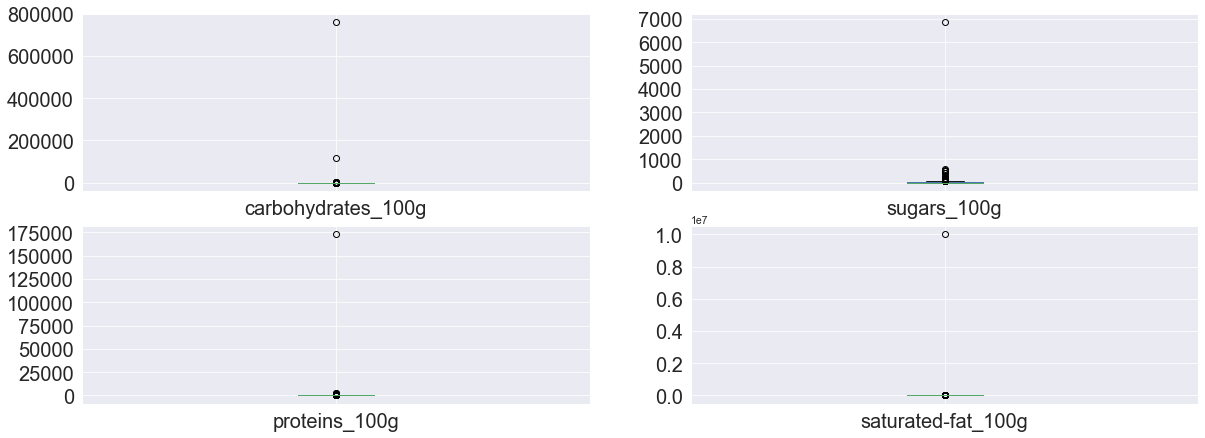

In [57]:
# title='Distribution des valeurs'
fooddf.select_dtypes(include=float).plot(kind='box', subplots=True, figsize=(20,15), layout=(4,2),fontsize=20)
plt.show()

In [58]:
fooddf.describe()

,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
count,557265.000000,546244.000000,557661.000000,5.266160e+05
mean,31.628011,14.685046,8.015737,2.424702e+01
std,1034.325149,22.332907,231.890729,1.378015e+04
min,0.000000,-1.000000,0.000000,0.000000e+00
25%,4.710000,0.900000,0.910000,0.000000e+00
50%,18.000000,4.700000,5.300000,1.800000e+00
75%,55.260000,21.650000,11.000000,7.230000e+00
max,762939.000000,6880.000000,173000.000000,9.999999e+06


In [59]:
fooddf.loc[fooddf['sugars_100g']==100].head(55)

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
352,Tnt Exploding Candy,"Snacks, Sweet snacks, Confectioneries",Confectioneries,Sweets,Angry Birds,100.0,100.0,0.0,0.0,0000790900115,https://www.bing.com/images/search?view=detail...
353,Exploding Candy,"Snacks, Sweet snacks, Confectioneries",Confectioneries,Sweets,Angry Birds,100.0,100.0,0.0,0.0,0000790900122,https://www.bing.com/images/search?view=detail...
377,White granulated sugar,"Sweeteners, Sugars",Sugars,Sweets,Inconnu,100.0,100.0,0.0,0.0,0000946001154,https://www.bing.com/images/search?view=detail...
388,Brown sugar,"Sweeteners, Sugars",Sugars,Sweets,Inconnu,100.0,100.0,0.0,0.0,0000946130007,https://www.bing.com/images/search?view=detail...
3984,"Kroeger, dessert topping, red sugar",Baking decorations,Baking-decorations,unknown,Kroeger,100.0,100.0,0.0,NaN,0011110701794,https://www.bing.com/images/search?view=detail...
3985,"Kroger, green sugar dessert toppings",Baking decorations,Baking-decorations,unknown,Kroger,100.0,100.0,0.0,NaN,0011110701800,https://www.bing.com/images/search?view=detail...
4555,Granulated Sugar,"Sweeteners, Sugars, Granulated sugars",Granulated sugars,Sweets,Psst,100.0,100.0,0.0,NaN,0011110823274,https://www.bing.com/images/search?view=detail...
4556,Granulated sugar,"Sweeteners, Sugars",Sugars,Sweets,Inconnu,100.0,100.0,0.0,NaN,0011110823281,https://www.bing.com/images/search?view=detail...
4860,Stevia Extract Blend,"Sweeteners, Sugars",Sugars,Sweets,Simple Truth Organic,100.0,100.0,0.0,NaN,0011110841902,https://www.bing.com/images/search?view=detail...
5077,Light brown sugar,"Sweeteners, Sugars, Brown sugars",Brown sugars,Sweets,Simple Truth Organic,100.0,100.0,0.0,0.0,0011110853257,https://static.openfoodfacts.org/images/produc...


# SUPPRIMER LES OUTLIERS

In [60]:
fooddf.loc[fooddf['sugars_100g']>=100]

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
352,Tnt Exploding Candy,"Snacks, Sweet snacks, Confectioneries",Confectioneries,Sweets,Angry Birds,100.0,100.0,0.0,0.0,0000790900115,https://www.bing.com/images/search?view=detail...
353,Exploding Candy,"Snacks, Sweet snacks, Confectioneries",Confectioneries,Sweets,Angry Birds,100.0,100.0,0.0,0.0,0000790900122,https://www.bing.com/images/search?view=detail...
377,White granulated sugar,"Sweeteners, Sugars",Sugars,Sweets,Inconnu,100.0,100.0,0.0,0.0,0000946001154,https://www.bing.com/images/search?view=detail...
388,Brown sugar,"Sweeteners, Sugars",Sugars,Sweets,Inconnu,100.0,100.0,0.0,0.0,0000946130007,https://www.bing.com/images/search?view=detail...
3984,"Kroeger, dessert topping, red sugar",Baking decorations,Baking-decorations,unknown,Kroeger,100.0,100.0,0.0,NaN,0011110701794,https://www.bing.com/images/search?view=detail...
...,...,...,...,...,...,...,...,...,...,...,...
737611,White Sugar,"Sweeteners, Sugars",Sugars,Sweets,"Bundaberg,Bonsucro",100.0,100.0,NaN,NaN,9310270010113,https://static.openfoodfacts.org/images/produc...
738007,Pure Icing Sugar,"Sweeteners, Sugars",Sugars,Sweets,CSR,100.0,100.0,NaN,0.0,9313010000771,https://static.openfoodfacts.org/images/produc...
738008,caster sugar,"Sweeteners, Sugars",Sugars,Sweets,csr,100.0,100.0,0.0,0.0,9313010102543,https://static.openfoodfacts.org/images/produc...
738009,Caster Sugar,"Sweeteners, Sugars",Sugars,Sweets,CSR,100.0,100.0,NaN,0.0,9313010102604,https://static.openfoodfacts.org/images/produc...


In [61]:
nutrinb(fooddf)

48634 produits n'ont pas de données nutritionnelles ie 8.698544996020425% of the data


In [62]:
fooddf.shape

(559105, 11)

#### SUPPRIMER LES VALEURS >=100 OU <0

In [63]:
withoutoutliersdf=fooddf[(fooddf['sugars_100g']<100)&(fooddf['sugars_100g']>=0)&(fooddf['carbohydrates_100g']<100)&(fooddf['carbohydrates_100g']>=0)&(fooddf['proteins_100g']<100)&(fooddf['proteins_100g']>=0)&(fooddf['saturated-fat_100g']<=100)&(fooddf['saturated-fat_100g']>=0)]
withoutoutliersdf

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...
5,Abondance,"Produits laitiers, Produits fermentés, Produit...",Abondance,Cheese,Inconnu,0.1,0.1,25.0,21.6,0000000005005,https://static.openfoodfacts.org/images/produc...
6,cuisse de poulet direct au four curry,"Viandes, Volailles, Poulets, Cuisses de poulet",Chicken thighs,Meat,Inconnu,3.0,0.9,17.0,4.0,0000000005166,https://static.openfoodfacts.org/images/produc...
7,Bagel,"Aliments et boissons à base de végétaux, Alime...",Bagel breads,Bread,Inconnu,28.7,3.0,8.4,1.1,0000000005241,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...
740263,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Dark chocolates,Chocolate products,Barry,30.7,26.9,7.6,28.2,9999900002553,https://static.openfoodfacts.org/images/produc...
740264,Riz au lait,"Desserts, Puddings, Riz au lait",Rice puddings,Dairy desserts,Inconnu,21.0,14.0,2.9,4.3,9999991042711,https://static.openfoodfacts.org/images/produc...
740265,Mousse au chocolat noir,"Desserts, Desserts au chocolat, Mousses au cho...",Chocolate mousses,unknown,Inconnu,19.0,18.0,6.0,17.0,9999991042742,https://static.openfoodfacts.org/images/produc...
740267,Minis beignets,"Snacks, Snacks sucrés, Beignets sucrés",Sweet Fritters,unknown,Inconnu,30.9,10.4,7.4,6.0,9999999004360,https://static.openfoodfacts.org/images/produc...


In [64]:
withoutoutliersdf.describe()

,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g
count,514898.000000,514898.000000,514898.000000,514898.000000
mean,29.984937,13.838382,8.087746,5.163999
std,27.665992,18.954793,8.761560,7.982842
min,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,1.600000,0.000000
50%,19.020000,4.400000,5.800000,1.800000
75%,55.000000,20.900000,11.300000,7.140000
max,99.950000,99.950000,99.000000,100.000000


#### IL NOUS RESTE PLUS DE VALEURS NULLES

In [65]:
withoutoutliersdf.isnull().mean()*100

product_name          0.0
categories            0.0
main_category_en      0.0
pnns_groups_2         0.0
brands                0.0
carbohydrates_100g    0.0
sugars_100g           0.0
proteins_100g         0.0
saturated-fat_100g    0.0
code                  0.0
image_url             0.0
dtype: float64

# SUPPRIMER LIGNES QUAND ON A PLUS QUE 100G SOMME DES VALEURS

In [66]:
withoutoutliersdf['sommeNutr']=withoutoutliersdf['carbohydrates_100g']+withoutoutliersdf['proteins_100g']+withoutoutliersdf['saturated-fat_100g']
withoutoutliersdf

,product_name,categories,main_category_en,pnns_groups_2,brands,carbohydrates_100g,sugars_100g,proteins_100g,saturated-fat_100g,code,image_url,sommeNutr
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",Coconut pies,Biscuits and cakes,"Crous Resto',Crous",27.3,21.9,4.6,15.5,0000000001281,https://static.openfoodfacts.org/images/produc...,47.4
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",Pear compotes,Fruits,Crous,36.0,27.0,0.6,0.0,0000000001885,https://static.openfoodfacts.org/images/produc...,36.6
5,Abondance,"Produits laitiers, Produits fermentés, Produit...",Abondance,Cheese,Inconnu,0.1,0.1,25.0,21.6,0000000005005,https://static.openfoodfacts.org/images/produc...,46.7
6,cuisse de poulet direct au four curry,"Viandes, Volailles, Poulets, Cuisses de poulet",Chicken thighs,Meat,Inconnu,3.0,0.9,17.0,4.0,0000000005166,https://static.openfoodfacts.org/images/produc...,24.0
7,Bagel,"Aliments et boissons à base de végétaux, Alime...",Bagel breads,Bread,Inconnu,28.7,3.0,8.4,1.1,0000000005241,https://static.openfoodfacts.org/images/produc...,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...
740263,Chocolat de Couverture Noir,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Dark chocolates,Chocolate products,Barry,30.7,26.9,7.6,28.2,9999900002553,https://static.openfoodfacts.org/images/produc...,66.5
740264,Riz au lait,"Desserts, Puddings, Riz au lait",Rice puddings,Dairy desserts,Inconnu,21.0,14.0,2.9,4.3,9999991042711,https://static.openfoodfacts.org/images/produc...,28.2
740265,Mousse au chocolat noir,"Desserts, Desserts au chocolat, Mousses au cho...",Chocolate mousses,unknown,Inconnu,19.0,18.0,6.0,17.0,9999991042742,https://static.openfoodfacts.org/images/produc...,42.0
740267,Minis beignets,"Snacks, Snacks sucrés, Beignets sucrés",Sweet Fritters,unknown,Inconnu,30.9,10.4,7.4,6.0,9999999004360,https://static.openfoodfacts.org/images/produc...,44.3


In [67]:
withoutoutliers=withoutoutliersdf[withoutoutliersdf['sommeNutr']<=100]
withoutoutliers
withoutoutliers=withoutoutliers.drop(['sommeNutr'],axis=1)


# Il nous reste 489073 lignes dans nos données

# SAUVEGARDER LE DATASET NETTOYE

In [68]:
withoutoutliers.to_csv('food_cleaned.csv') 


In [69]:
withoutoutliers.shape

(514672, 11)